# WGU Capstone Project

Quyen Trieu

Student ID: 010652257

White Blood Cell Image Recognition

16 July 2025

Instructor: Jim Ashe

In [2]:
# Import Library and Link files directrory
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Next I'm going to load the trained data

In [3]:
# Here I create a directory base for easy navigation
base_dir = '../capstone_qt/dataset2-master/dataset2-master/images'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [4]:
# Directory with our training neutrophil pictures
train_neu_dir = os.path.join(train_dir, 'NEUTROPHIL')

# Directory with our training eosinophil pictures
train_eos_dir = os.path.join(train_dir, 'EOSINOPHIL')

# Directory with our training lymphocyte pictures
train_lym_dir = os.path.join(train_dir, 'LYMPHOCYTE')

# Directory with our training monocyte pictures
train_mon_dir = os.path.join(train_dir, 'MONOCYTE')

#---------------------------------------------------

# Directory with our test neutrophil pictures
test_neu_dir = os.path.join(test_dir, 'NEUTROPHIL')

# Directory with our test eosinophil pictures
test_eos_dir = os.path.join(test_dir, 'EOSINOPHIL')

# Directory with our test lymphocyte pictures
test_lym_dir = os.path.join(test_dir, 'LYMPHOCYTE')

# Directory with our test monocyte pictures
test_mon_dir = os.path.join(test_dir, 'MONOCYTE')

I want to see the total of files in the train directory to make sure my code is correct

In [5]:
def count_files_in_directory(directory_path):
   
    file_count = 0
    for root, _, files in os.walk(directory_path):
        file_count += len(files)
    return file_count

total_files = count_files_in_directory(train_dir)
print(f"Total number of files in '{train_dir}': {total_files}")

#Total train images should be 9957

Total number of files in '../capstone_qt/dataset2-master/dataset2-master/images/TRAIN': 9958


Now I'm going to check what filenames look like in each of the white blood cell train directories

In [6]:
train_neu_fnames = os.listdir(train_neu_dir)
#train_neu_fnames.sort()
print(train_neu_fnames[:10])

train_eos_fnames = os.listdir(train_eos_dir)
#train_eos_fnames.sort()
print(train_eos_fnames[:10])

train_lym_fnames = os.listdir(train_lym_dir)
#train_lym_fnames.sort()
print(train_lym_fnames[:10])

train_mon_fnames = os.listdir(train_mon_dir)
#train_mon_fnames.sort()
print(train_mon_fnames[:10])

['_142_4726.jpeg', '_129_6939.jpeg', '_34_7704.jpeg', '_155_8195.jpeg', '_45_3300.jpeg', '_104_9961.jpeg', '_122_4102.jpeg', '_95_5558.jpeg', '_57_3136.jpeg', '_102_5518.jpeg']
['_18_9690.jpeg', '_55_7307.jpeg', '_31_1626.jpeg', '_32_1223.jpeg', '_70_1887.jpeg', '_7_4135.jpeg', '_3_1109.jpeg', '_28_4347.jpeg', '_36_8683.jpeg', '_51_8809.jpeg']
['_6_1405.jpeg', '_13_4518.jpeg', '_19_3956.jpeg', '_12_5987.jpeg', '_20_4702.jpeg', '_11_8933.jpeg', '_20_6945.jpeg', '_19_1204.jpeg', '_24_9162.jpeg', '_14_2074.jpeg']
['_4_825.jpeg', '_3_8282.jpeg', '_8_9083.jpeg', '_9_5268.jpeg', '_13_9280.jpeg', '_15_9366.jpeg', '_15_895.jpeg', '_3_2660.jpeg', '_12_2192.jpeg', '_13_447.jpeg']


Find out the total number of images per each blood cell type in the train and test directories:

In [7]:
dirLists = { 'neutrophil': (train_neu_fnames, test_neu_dir), 'eosinophil': (train_eos_fnames, test_eos_dir), 
        'lymphocyte': (train_lym_fnames, test_lym_dir), 'monocyte': (train_mon_fnames, test_mon_dir) }

for cellName, (train_dirs, test_dirs) in dirLists.items(): 
    print(f'total training {cellName} images: ', len(train_dirs)) 
    print(f'total testing {cellName} images: ', len(os.listdir(test_dirs)))

total training neutrophil images:  2499
total testing neutrophil images:  624
total training eosinophil images:  2497
total testing eosinophil images:  623
total training lymphocyte images:  2483
total testing lymphocyte images:  620
total training monocyte images:  2478
total testing monocyte images:  620


Examine a few pictures to study some of the cell features.

In [8]:
%matplotlib inline

import matplotlib.image as mpimg

#Parameter of the graph with output images in a 4x4 config
nrows = 4
ncols = 4

#Index for iterating over images
pic_index = 0

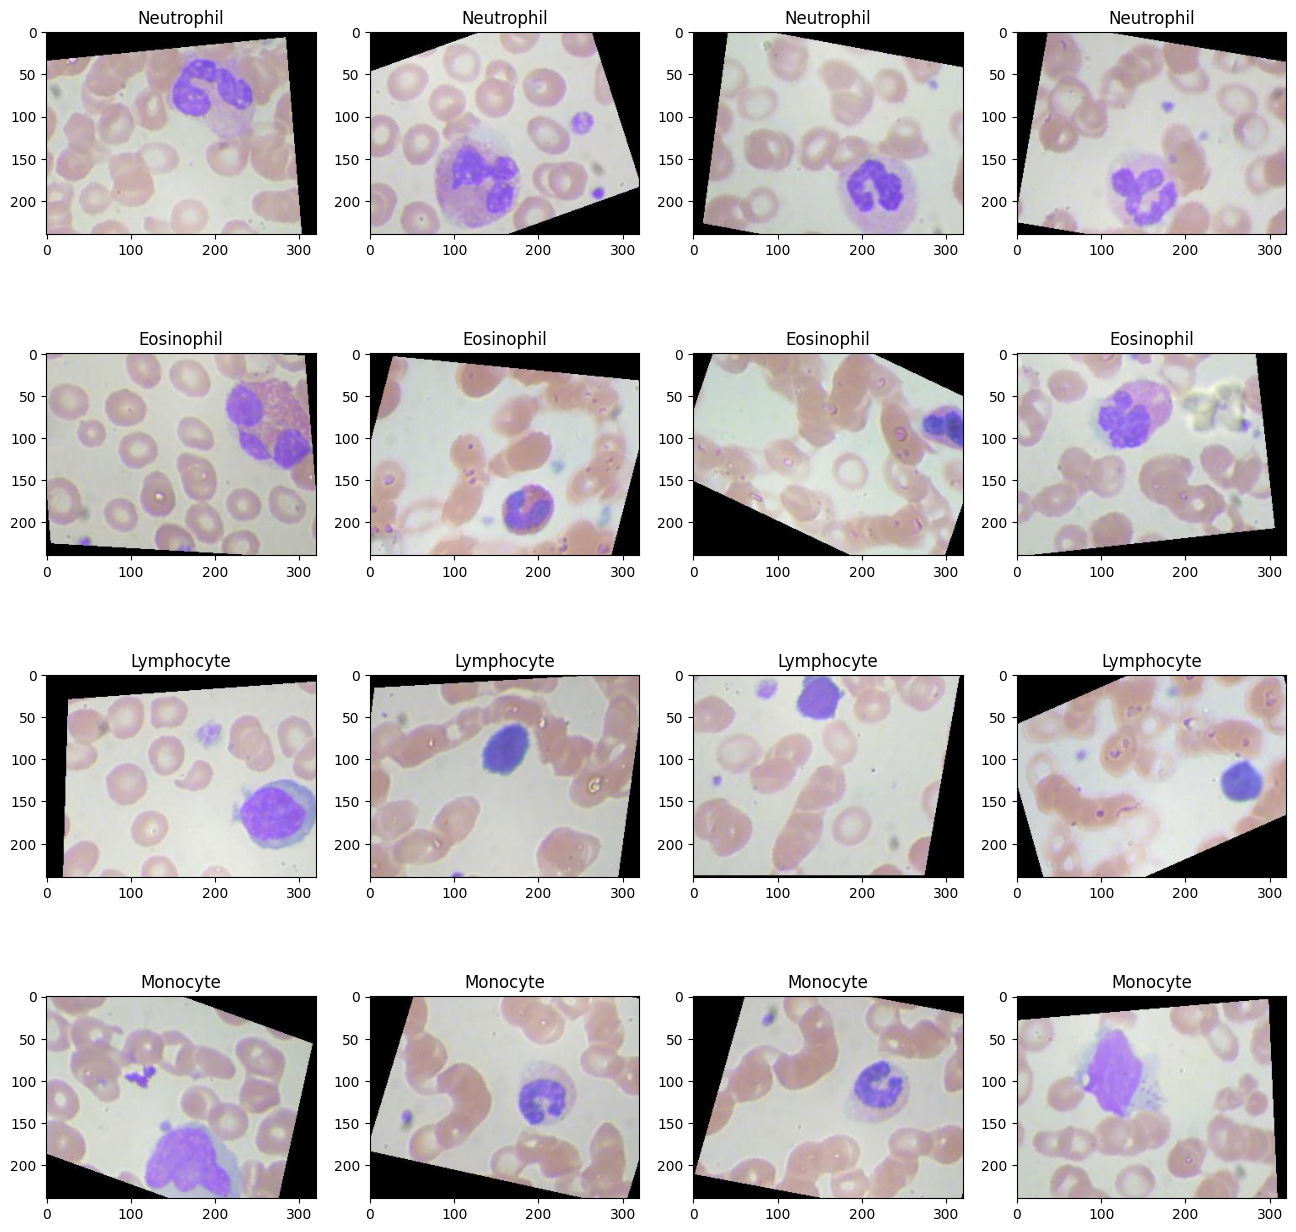

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_neu_pix = [os.path.join(train_neu_dir, fname) 
                for fname in train_neu_fnames[pic_index-4:pic_index]]
next_eos_pix = [os.path.join(train_eos_dir, fname) 
                for fname in train_eos_fnames[pic_index-4:pic_index]]
next_lym_pix = [os.path.join(train_lym_dir, fname) 
                for fname in train_lym_fnames[pic_index-4:pic_index]]
next_mon_pix = [os.path.join(train_mon_dir, fname) 
                for fname in train_mon_fnames[pic_index-4:pic_index]]

# Combine all image paths
all_images = next_neu_pix + next_eos_pix + next_lym_pix + next_mon_pix

# Ensure only process up to 16 images
all_images = all_images[:16]

#Create cell image title 
cell_names = ['Neutrophil', 'Eosinophil', 'Lymphocyte', 'Monocyte']

repeated_cell_names = [cell for cell in cell_names for _ in range(4)]

for i, img_path in enumerate(all_images):
  # Set up subplot; subplot indices start at 1 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Do or Don't show axes
  plt.title(repeated_cell_names[i])
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
# This will showed trained data with augmented images. It should displays four images of each class of white blood cell (WBC)

Now I'm going to import keras to implement a CNN using a sequential model and Conv2D methodology. I tested out several convolutional layers and currently satified with this layout.

In [10]:
from tensorflow import keras

img_input = tf.keras.models.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    #Added Extra layer
    #keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    #keras.layers.BatchNormalization(),
    #keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])
model = img_input
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001), #SGD performs better than Adam for in this case
    metrics=['accuracy']
)


I0000 00:00:1752605126.252352      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,04

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [ ]:
#tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True, dpi =50)

I implement a validation_split to reduce the overfitting issue later

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_gen = ImageDataGenerator(
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input, validation_split = 0.2)

test_image_gen = ImageDataGenerator(
    preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input, validation_split = 0.2)

In [13]:
train_gen = train_image_gen.flow_from_directory(directory = train_dir,
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=True, 
                                      seed = 42,
                                      subset='training'
                                     )

val_gen = train_image_gen.flow_from_directory(directory = train_dir,
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False, #Do not Shuffle Data
                                    seed =42,
                                    subset ='validation'          
                                   )
test_gen = test_image_gen.flow_from_directory(directory = test_dir,
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle=False,
                                     seed=42
                                    )

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [14]:
# Now run the model.fit() function to initate the training process. This process will consume a lot of time to complete.
# I found that Epochs at 40 is aligned with the scope of this project without have to use the early stopping function.
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs = 40,
    verbose = 1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1752605164.530917      97 service.cc:148] XLA service 0x7946380024c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752605164.531748      97 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752605165.075261      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/249 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.1250 - loss: 4.0239   

I0000 00:00:1752605178.009693      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.2906 - loss: 2.3704

E0000 00:00:1752605234.136523     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752605234.369908     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


249/249 ━━━━━━━━━━━━━━━━━━━━ 75s 231ms/step - accuracy: 0.2907 - loss: 2.3687 - val_accuracy: 0.2594 - val_loss: 1.6328
Epoch 2/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.4243 - loss: 1.3795 - val_accuracy: 0.5963 - val_loss: 1.0011
Epoch 3/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.5424 - loss: 1.0545 - val_accuracy: 0.6596 - val_loss: 0.8064
Epoch 4/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.6480 - loss: 0.8225 - val_accuracy: 0.7391 - val_loss: 0.6131
Epoch 5/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7392 - loss: 0.6123 - val_accuracy: 0.8276 - val_loss: 0.4419
Epoch 6/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.8049 - loss: 0.4759 - val_accuracy: 0.8547 - val_loss: 0.3581
Epoch 7/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - accuracy: 0.8508 - loss: 0.3745 - val_accuracy: 0.8803 - val_loss: 0.2989
Epoch 8/40
249/249 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.8822 - loss: 0.2970 - val_ac

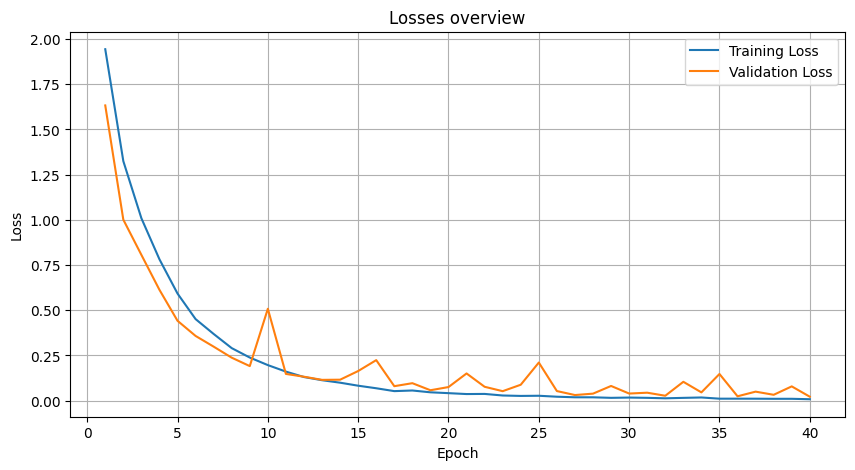

In [15]:
#print(history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt. figure(figsize = (10, 5))
plt.plot (epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label ='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses overview')
plt.legend()
plt.grid(True)
plt.show()

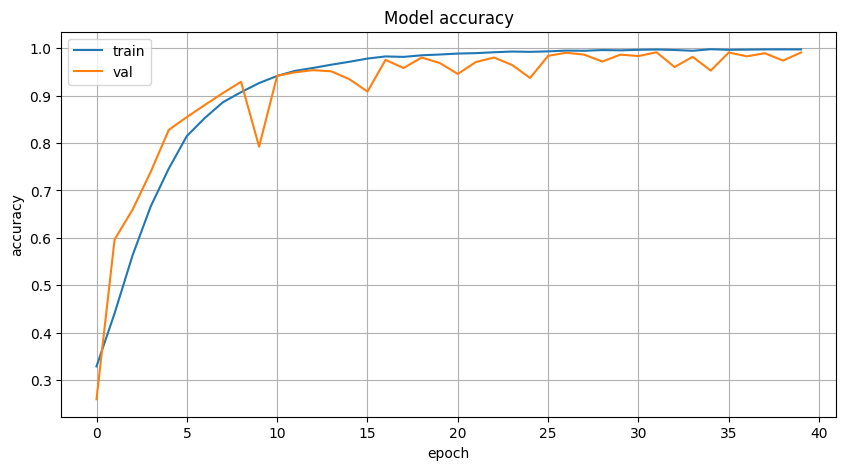

In [16]:
plt. figure(figsize = (10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)
plt.show()

In [17]:
WBC_Names = list(train_gen.class_indices.keys())
WBC_Names

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step

E0000 00:00:1752606566.787776      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752606567.026727      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step
Test Accuracy: 82.147%


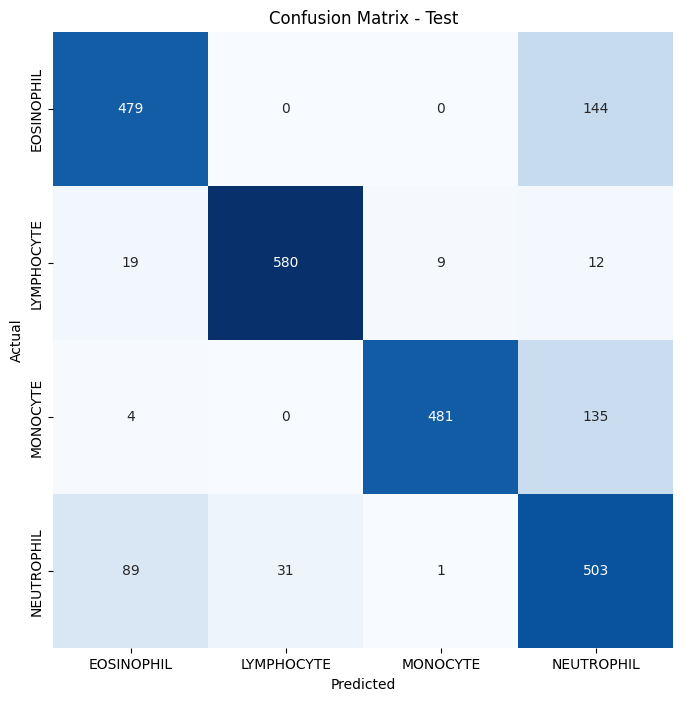

Classification Report:
----------------------
               precision    recall  f1-score   support

  EOSINOPHIL       0.81      0.77      0.79       623
  LYMPHOCYTE       0.95      0.94      0.94       620
    MONOCYTE       0.98      0.78      0.87       620
  NEUTROPHIL       0.63      0.81      0.71       624

    accuracy                           0.82      2487
   macro avg       0.84      0.82      0.83      2487
weighted avg       0.84      0.82      0.83      2487



In [18]:
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns

predictions = np.argmax(model.predict(test_gen), axis=1)

acc = accuracy_score(test_gen.labels, predictions)
cm = tf.math.confusion_matrix(test_gen.labels, predictions)
clr = classification_report(test_gen.labels, predictions, target_names=WBC_Names)

print("Test Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=WBC_Names)
plt.yticks(ticks= np.arange(4) + 0.5, labels=WBC_Names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test")
plt.show()

print("Classification Report:\n----------------------\n", clr)

#Test Accuracy is expected between 75-85% for this test prediction

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step
Validation Accuracy: 99.095%


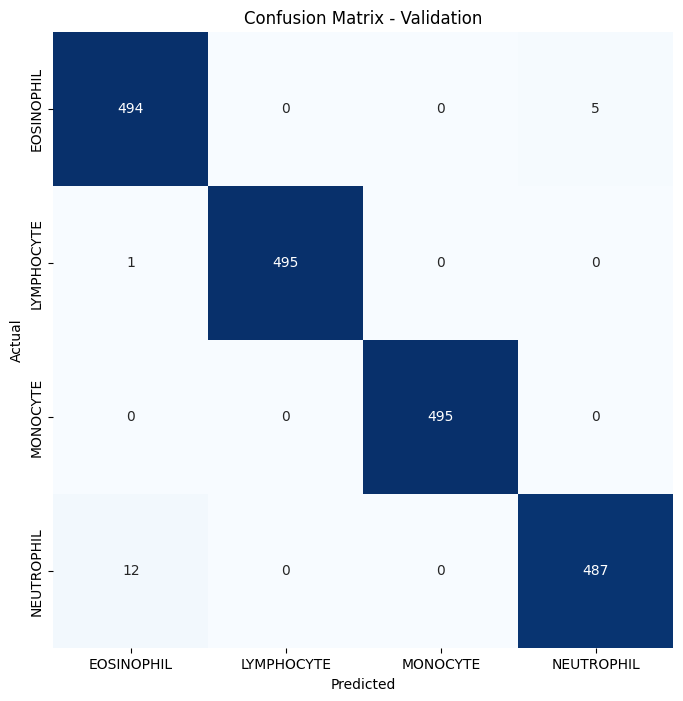

In [19]:
predictions = np.argmax(model.predict(val_gen), axis=1)

acc = accuracy_score(val_gen.labels, predictions)
cm = tf.math.confusion_matrix(val_gen.labels, predictions)
clr = classification_report(val_gen.labels, predictions, target_names=WBC_Names)

print("Validation Accuracy: {:.3f}%".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks= np.arange(4) + 0.5, labels=WBC_Names)
plt.yticks(ticks= np.arange(4) + 0.5, labels=WBC_Names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation")
plt.show()

#Expect 98-99% accuracy for this validation predcition

In [20]:
#Run the evaluate test to compare the reloaded model.
model.evaluate(test_gen, verbose=1)

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8114 - loss: 0.6354


[0.5738956928253174, 0.821471631526947]

In [ ]:
#Save the model which I can import back later without having to run the retraining process.
model.save('CapStoneBloodModel2.h5')

In [ ]:
#Load the model back
modelTest = keras.models.load_model('CapStoneBloodModel2.h5')

In [24]:
# Rerun the evaluate function accuracy and loss should be identical as the previous evaluation
modelTest.evaluate(test_gen, verbose=1)

78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8114 - loss: 0.6354


[0.5738956928253174, 0.821471631526947]

Now I will create an interface to test the model.

Run the cell below to generate an image. Rerun the cell will randomly generate a new image

Several image might resulted in error, simply rerun to fix the issue.

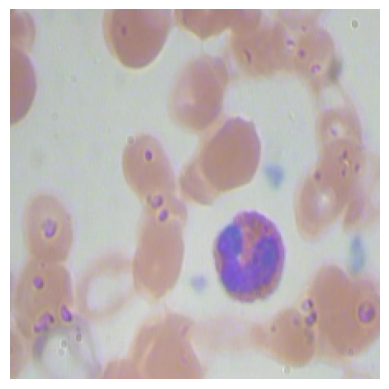

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import random


image_range = range(0, 100)
random_number = random.choice(image_range)

cell_img_path = '../capstone_qt/dataset2-master/JPEGImages/'
#cell_img_path = '../capstone_qt/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_842.jpeg'
random_image = f"{cell_img_path}BloodImage_00{random_number:03d}.jpg"
cell_img = Image.open(random_image)

# Convert the image to a TensorFlow tensor
cell_img_tensor = tf.convert_to_tensor(cell_img)

# Resize the image
resize = tf.image.resize(cell_img_tensor, (224, 224))

# Convert the tensor back to a NumPy array for displaying
resize_np = resize.numpy().astype('uint8')

# Display the resized image
plt.imshow(resize_np, cmap='Greys')
plt.axis('off')  
plt.show()

Run the following cells to see the results

In [46]:
test1 = modelTest.predict(np.expand_dims(resize/255, axis=0))
test1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[3.5181943e-02, 1.4075318e-03, 7.4560644e-06, 9.6340299e-01]],
      dtype=float32)

In [47]:
predicted_class_index = np.argmax(test1)
predicted_class = WBC_Names[predicted_class_index]

print(f'Predicted cell is {predicted_class}')

Predicted cell is NEUTROPHIL


The model is highly sensitive for neutrophils because it is the majority in the data. Also, due to the quality of the picture and how the blood slide is being prepared, some eosinophils and monocytes might be mistakenly identified as neutrophils, as they also have a similar appearance to humans.